# 9. High Accuracy CNN for MNIST

_Exercise: Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST._

In [66]:
from keras.api.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense, Dropout
from keras.api.datasets import mnist
from keras.api.models import Sequential
from keras.api.losses import SparseCategoricalCrossentropy

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

In [78]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
y_train.shape

(60000,)

In [69]:
X_test.shape

(10000, 28, 28)

In [79]:
# Normalize pixel values to be between 0 and 1
X_train_normalized, X_test_normalized = X_train / 255.0, X_test / 255.0

In [80]:
X_train_normalized = X_train_normalized[..., np.newaxis]
X_test_normalized = X_test_normalized[..., np.newaxis]

In [81]:
X_valid_normalized = X_train_normalized[-5_000:]
X_train_normalized = X_train_normalized[:-5_000]
print(X_valid_normalized.shape)
print(X_train_normalized.shape)

y_valid = y_train[-5_000:]
y_train = y_train[:-5_000]
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28, 1)
(55000, 28, 28, 1)
(5000,)
(55000,)


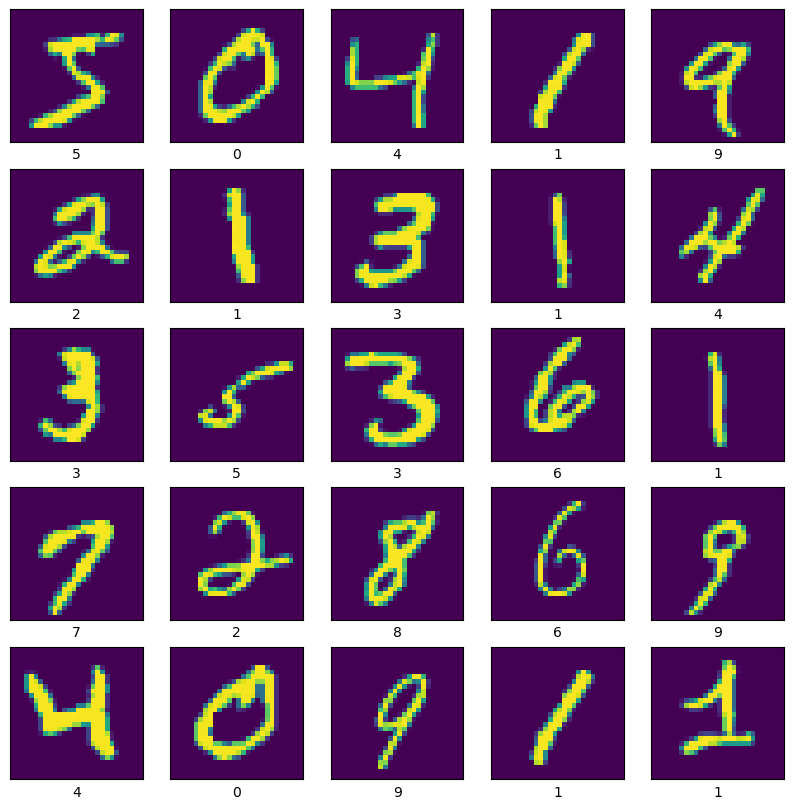

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_normalized[i])
    plt.xlabel(y_train[i])
plt.show()

## Basic setup

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10))
    print(model.summary())

    model.compile(optimizer='adam',
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

In [ ]:
def fit_and_evaluate(model):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    history = model.fit(X_train_normalized, y_train, epochs=10, 
                    validation_data=(X_valid_normalized, y_valid))

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.94, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(X_test_normalized, y_test, verbose=2)
    print(test_acc)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8845 - loss: 0.3630 - val_accuracy: 0.9868 - val_loss: 0.0432
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9862 - val_loss: 0.0515
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0337 - val_accuracy: 0.9904 - val_loss: 0.0407
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9916 - loss: 0.0250 - val_accuracy: 0.9908 - val_loss: 0.0404
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9924 - val_loss: 0.0349
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9922 - val_loss: 0.0379
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9936 - val_loss: 0.0360
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9958 - loss: 0.0

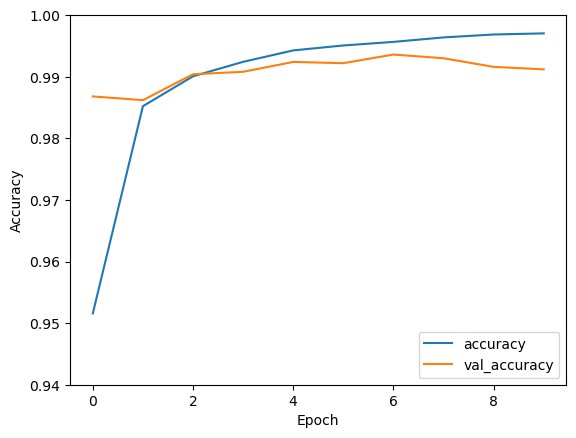

In [72]:
model = prepare_model()
fit_and_evaluate(model)

## Add dropout layers (7% improvement)

Regularization to avoid overfitting.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.25)),
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5)),
    model.add(Dense(10))
    print(model.summary())

    model.compile(optimizer='adam',
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7927 - loss: 0.6252 - val_accuracy: 0.9852 - val_loss: 0.0483
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9684 - loss: 0.1111 - val_accuracy: 0.9870 - val_loss: 0.0457
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9776 - loss: 0.0804 - val_accuracy: 0.9900 - val_loss: 0.0357
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9820 - loss: 0.0667 - val_accuracy: 0.9904 - val_loss: 0.0362
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0545 - val_accuracy: 0.9928 - val_loss: 0.0279
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0479 - val_accuracy: 0.9916 - val_loss: 0.0322
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0433 - val_accuracy: 0.9914 - val_loss: 0.0380
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0

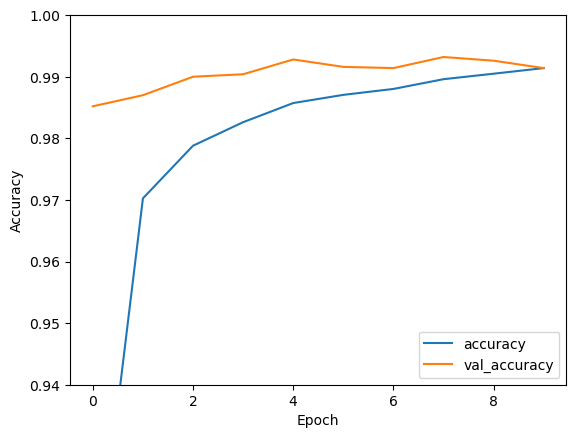

In [83]:
model = prepare_model()
fit_and_evaluate(model)

## "Same" padding (23% improvement)

"Same" padding helps to prevent information loss at the edges of the input, which can be significant, especially in deeper layers.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.25)),
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5)),
    model.add(Dense(10))
    print(model.summary())

    model.compile(optimizer='adam',
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


2025-02-25 11:48:30.583940: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,14,14]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-25 11:48:30.948518: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", bac

1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.5616

2025-02-25 11:48:41.797070: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[24,64,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,32,14,14]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-25 11:48:42.168842: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[24,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", bac

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8190 - loss: 0.5614

2025-02-25 11:48:45.553963: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,14,14]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-25 11:48:45.919722: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", bac

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8191 - loss: 0.5613 - val_accuracy: 0.9846 - val_loss: 0.0470
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9698 - loss: 0.1052 - val_accuracy: 0.9888 - val_loss: 0.0373
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9783 - loss: 0.0771 - val_accuracy: 0.9924 - val_loss: 0.0313
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9811 - loss: 0.0655 - val_accuracy: 0.9912 - val_loss: 0.0296
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9858 - loss: 0.0516 - val_accuracy: 0.9926 - val_loss: 0.0300
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0473 - val_accuracy: 0.9926 - val_loss: 0.0335
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9882 - loss: 0.0397 - val_accuracy: 0.9942 - val_loss: 0.0311
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9892 - loss: 0.0351 - val_accura

2025-02-25 11:49:56.376783: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,64,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,14,14]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-25 11:49:56.731673: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", bac

313/313 - 2s - 6ms/step - accuracy: 0.9934 - loss: 0.0257
0.993399977684021


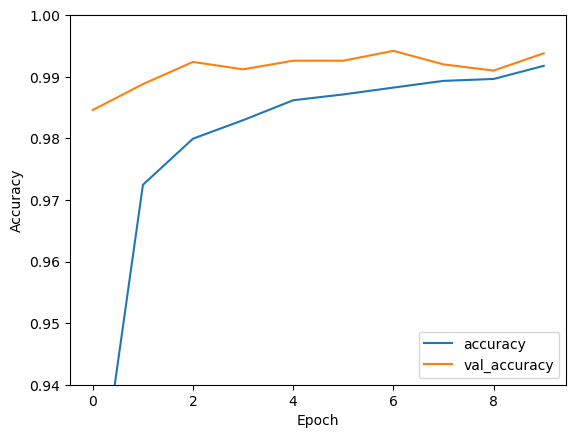

In [87]:
model = prepare_model()
fit_and_evaluate(model)

## "he_normal" Kernel Initialization (-13% improvement)

Glorot initialization, while effective for activation functions like sigmoid and tanh, doesn't adequately account for the characteristics of ReLU.

 Therefore, it may not provide optimal gradient flow in ReLU-heavy networks.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(Flatten())
    model.add(Dropout(0.25)),
    model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
    model.add(Dropout(0.5)),
    model.add(Dense(10))
    print(model.summary())

    model.compile(optimizer='adam',
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8421 - loss: 0.4920 - val_accuracy: 0.9866 - val_loss: 0.0426
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9671 - loss: 0.1141 - val_accuracy: 0.9906 - val_loss: 0.0305
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9776 - loss: 0.0805 - val_accuracy: 0.9914 - val_loss: 0.0308
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9804 - loss: 0.0655 - val_accuracy: 0.9946 - val_loss: 0.0247
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0551 - val_accuracy: 0.9924 - val_loss: 0.0284
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9868 - loss: 0.0464 - val_accuracy: 0.9904 - val_loss: 0.0405
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9880 - loss: 0.0401 - val_accuracy: 0.9898 - val_loss: 0.0419
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9892 - loss: 0.0

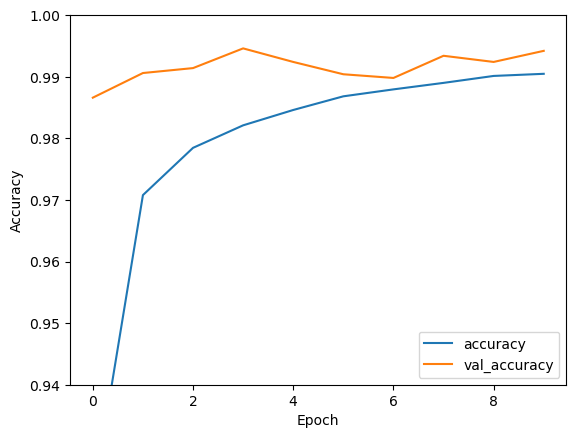

In [89]:
model = prepare_model()
fit_and_evaluate(model)

# "nadam" optimizer (14% improvement)

Nadam builds upon Adam by incorporating NAG, making it potentially more effective for complex models and situations where faster, more accurate convergence is desired.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(Flatten())
    model.add(Dropout(0.25)),
    model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
    model.add(Dropout(0.5)),
    model.add(Dense(10))
    print(model.summary())

    model.compile(optimizer='nadam',
                loss=SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
  25/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2050 - loss: 2.4811

2025-02-25 12:03:17.883356: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion', 4 bytes spill stores, 16 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8321 - loss: 0.5204

2025-02-25 12:03:25.650649: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion', 4 bytes spill stores, 16 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8321 - loss: 0.5202 - val_accuracy: 0.9866 - val_loss: 0.0446
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9702 - loss: 0.1048 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9785 - loss: 0.0793 - val_accuracy: 0.9914 - val_loss: 0.0304
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9817 - loss: 0.0621 - val_accuracy: 0.9922 - val_loss: 0.0295
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9857 - loss: 0.0512 - val_accuracy: 0.9922 - val_loss: 0.0305
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0464 - val_accuracy: 0.9916 - val_loss: 0.0394
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9926 - val_loss: 0.0361
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0378 - val_accura

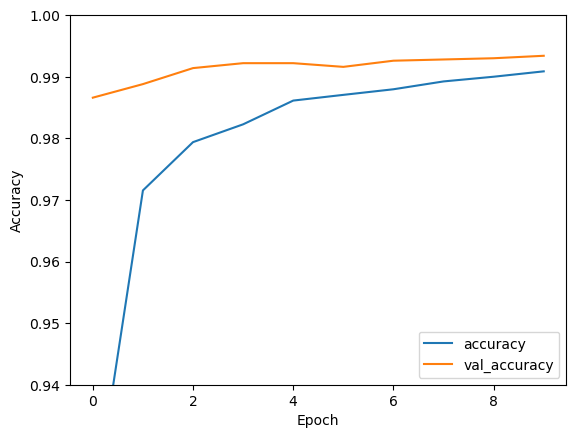

In [91]:
model = prepare_model()
fit_and_evaluate(model)

## "softmax" as output layer activation function (-21% improvement)

Softmax is designed to produce a probability distribution over a set of categories.

In [ ]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(Flatten())
    model.add(Dropout(0.25)),
    model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
    model.add(Dropout(0.5)),
    model.add(Dense(10, activation="softmax"))
    print(model.summary())

    model.compile(optimizer='nadam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    
    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8657 - loss: 0.4270 - val_accuracy: 0.9884 - val_loss: 0.0428
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9738 - loss: 0.0898 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9814 - loss: 0.0660 - val_accuracy: 0.9906 - val_loss: 0.0346
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9852 - loss: 0.0534 - val_accuracy: 0.9934 - val_loss: 0.0292
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0466 - val_accuracy: 0.9922 - val_loss: 0.0303
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9926 - val_loss: 0.0309
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9914 - val_loss: 0.0353
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9906 - loss: 0

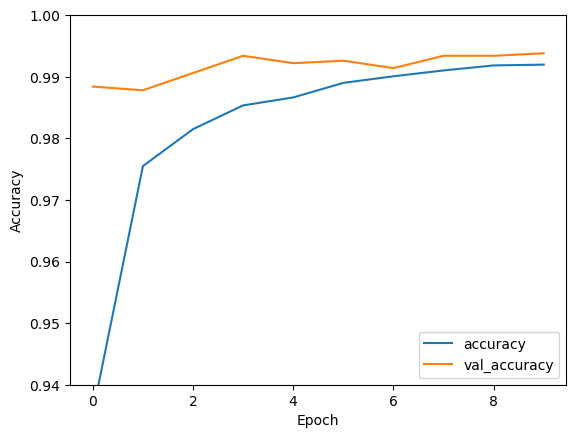

In [95]:
model = prepare_model()
fit_and_evaluate(model)

## Flatten model by stacking convolutional layers on top of each other (-2% improvement)

The main innovations in AlexNet compared to LeNet-5 are that it is much larger and deeper, and it stacks convolutional layers directly on top of each other, instead of stacking a pooling layer on top of each convolutional layer

In [96]:
def prepare_model():
    model = Sequential()
    model.add(InputLayer((28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="he_normal"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25)),
    model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
    model.add(Dropout(0.5)),
    model.add(Dense(10, activation="softmax"))
    print(model.summary())

    model.compile(optimizer='nadam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    
    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,346 (3.14 MB)

 Trainable params: 822,346 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


2025-02-25 12:18:41.327493: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,28,28]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


  20/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2354 - loss: 2.2296

2025-02-25 12:18:44.275374: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion', 4 bytes spill stores, 16 bytes spill loads



1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8505 - loss: 0.4732

2025-02-25 12:18:57.495376: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[24,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,32,28,28]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8508 - loss: 0.4725

2025-02-25 12:18:58.572053: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion', 4 bytes spill stores, 16 bytes spill loads

2025-02-25 12:18:58.906802: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,28,28]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-25 12:19:00.048164: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} 

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8508 - loss: 0.4724 - val_accuracy: 0.9862 - val_loss: 0.0528
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9637 - loss: 0.1227 - val_accuracy: 0.9882 - val_loss: 0.0421
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9731 - loss: 0.0920 - val_accuracy: 0.9898 - val_loss: 0.0440
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9778 - loss: 0.0747 - val_accuracy: 0.9928 - val_loss: 0.0326
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9810 - loss: 0.0611 - val_accuracy: 0.9916 - val_loss: 0.0395
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9836 - loss: 0.0552 - val_accuracy: 0.9926 - val_loss: 0.0327
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9841 - loss: 0.0490 - val_accuracy: 0.9924 - val_loss: 0.0386
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9854 - loss: 0.0465 - val

2025-02-25 12:20:54.047739: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,28,28]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


313/313 - 2s - 6ms/step - accuracy: 0.9916 - loss: 0.0363
0.991599977016449


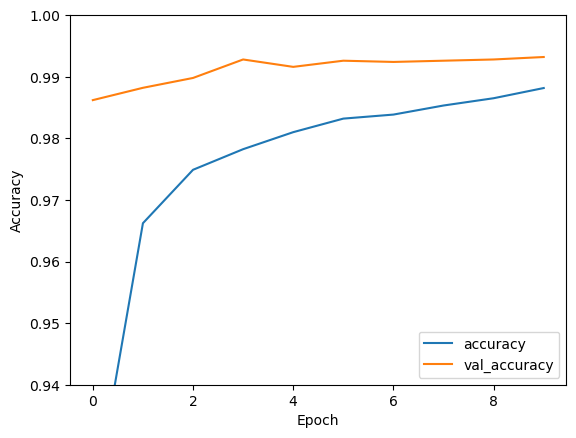

In [97]:
model = prepare_model()
fit_and_evaluate(model)